In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3 parameters

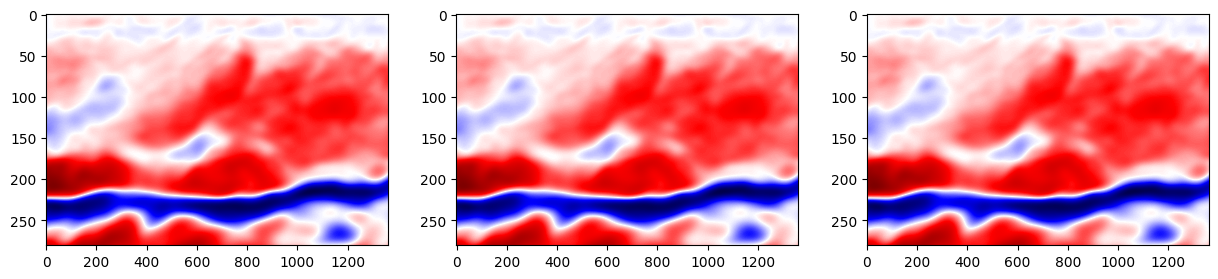

In [126]:
F = 0
epoch = 499
PMLN = 50
dx = dz = 12.5
EXPAND = 100
root_path = r"/public1/home/wangsw/FWI/AFWI/marmousi2/fixed/acoustic/test_implicit"
vp = np.load(f"{root_path}/paravpF{F:02d}E{epoch:02d}.npy")[PMLN:-PMLN,PMLN+EXPAND:-PMLN-EXPAND]
vs = np.load(f"{root_path}/paravpF{F:02d}E{epoch:02d}.npy")[PMLN:-PMLN,PMLN+EXPAND:-PMLN-EXPAND]
rho = np.load(f"{root_path}/paravpF{F:02d}E{epoch:02d}.npy")[PMLN:-PMLN,PMLN+EXPAND:-PMLN-EXPAND]

fig, axes = plt.subplots(1,3, figsize=(15,3))
for d, ax in zip([vp, vs, rho], axes.ravel()):
    ax.imshow(d.squeeze(), aspect='auto', cmap=plt.cm.seismic)
plt.show()


## Load true model

In [127]:
true_vp = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/true_vp_z12.5m_x12.5m_expand.npy")#[:,EXPAND:-EXPAND]
true_vs = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/true_vs_z12.5m_x12.5m_expand.npy")[:,EXPAND:-EXPAND]
true_rho = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/true_rho_z12.5m_x12.5m_expand.npy")[:,EXPAND:-EXPAND]

In [128]:
# sea_mask = np.ones_like(true_vp)
# sea_mask[0:35,:] = 0
# print(sea_mask.shape)
# plt.imshow(sea_mask)
# plt.show()
# np.save("/home/wangsw/Desktop/wangsw/fwi/geometry/marmousi_fixed/sea.npy", sea_mask)

In [129]:
init_vp = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/init_vp_z12.5m_x12.5m_expand.npy")[:,EXPAND:-EXPAND]
init_vs = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/init_vs_z12.5m_x12.5m_expand.npy")[:,EXPAND:-EXPAND]
init_rho = np.load("/home/les_01/wangsw/models/marmousi/elastic_modified/init_rho_z12.5m_x12.5m_expand.npy")[:,EXPAND:-EXPAND]

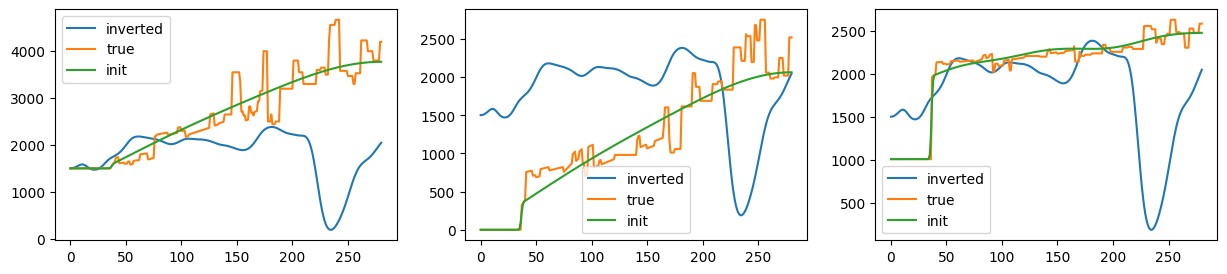

In [131]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
trace = 800
for inverted, true, init, ax in zip([vp, vs, rho],
                                    [true_vp, true_vs, true_rho], 
                                    [init_vp, init_vs, init_rho], 
                                    axes.ravel()):
    ax.plot(inverted[:, trace], label="inverted")
    ax.plot(true[:, trace], label="true")
    ax.plot(init[:, trace], label="init")
    ax.legend()
plt.show()

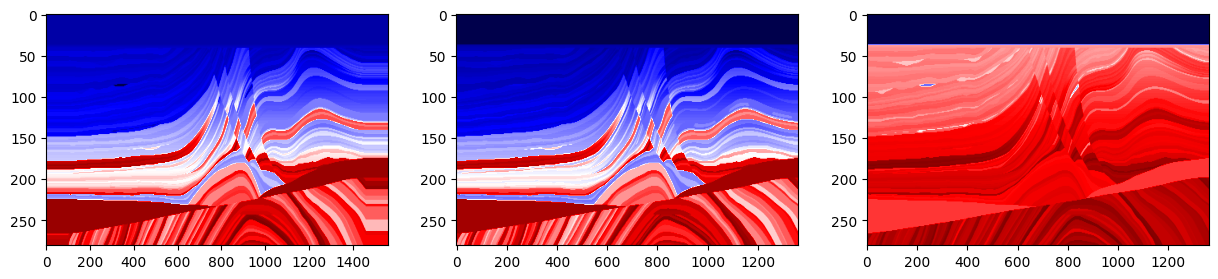

In [63]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
for d, ax in zip([true_vp, true_vs, true_rho], axes.ravel()):
    ax.imshow(d.squeeze(), aspect='auto', cmap=plt.cm.seismic)
plt.show()

In [64]:
template = np.load("/mnt/data/wangsw/inversion/elastic_marmousi/results/fixed/aec/iml1_xz/gradvpF01E45.npy")[50:-50,50:-50]
dest = np.load("/mnt/data/wangsw/inversion/elastic_marmousi/results/fixed/aec/test/gradvpF01E45.npy")[50:-50,50:-50]
np.allclose(template, dest)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/wangsw/inversion/elastic_marmousi/results/fixed/aec/iml1_xz/gradvpF01E45.npy'

In [26]:
(dest-template).max(), (dest-template).min()

(0.0, 0.0)

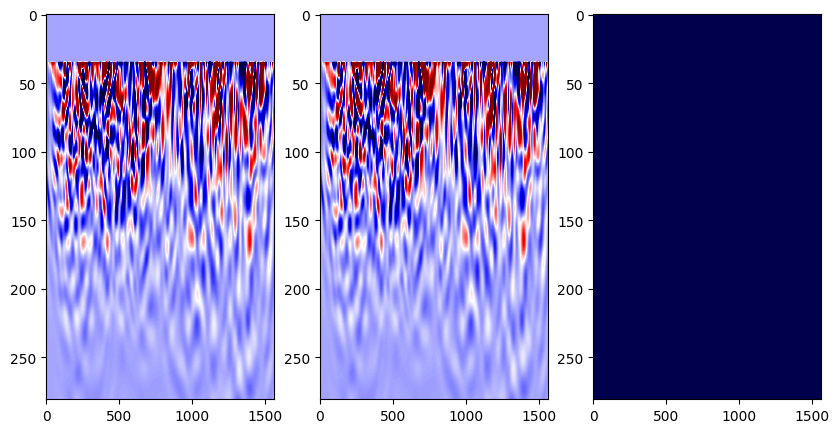

In [27]:
vmin, vmax = np.percentile(template, [2,98])
fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(template.squeeze(), vmin=vmin, vmax=vmax, aspect='auto', cmap=plt.cm.seismic)
axes[1].imshow(dest.squeeze(), aspect='auto', cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
axes[2].imshow(dest.squeeze()-template.squeeze(), aspect='auto', cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

plt.show()